In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\1000 MEEZA\AppData\Local\Temp\ipykernel_13448\3970977394.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df["Insurance Provider"].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [7]:
# تحويل عمود 'Date of Admission' و 'Discharge Date' إلى صيغة تاريخية
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# حساب عدد الأيام التي قضاها المريض في المستشفى
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# بعد ذلك يمكنك تقسيم التواريخ إلى مكونات اليوم، الشهر، والسنة إذا كنت بحاجة لذلك
df['Admission Day'] = df['Date of Admission'].dt.day
df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

# يمكنك بعد ذلك حذف التواريخ الأصلية إذا لم تكن بحاجة إليها
df = df.drop(columns=['Date of Admission', 'Discharge Date'])

# عرض أول بضعة أسطر للتحقق من النتائج
df[['Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month', 'Discharge Year', 'Length of Stay']].head()


,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year,Length of Stay
0,31,1,2024,2,2,2024,2
1,20,8,2019,26,8,2019,6
2,22,9,2022,7,10,2022,15
3,18,11,2020,18,12,2020,30
4,19,9,2022,9,10,2022,20


In [8]:
df.head(9)

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Length of Stay,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year
0,Bobby JacksOn,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2,31,1,2024,2,2,2024
1,LesLie TErRy,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6,20,8,2019,26,8,2019
2,DaNnY sMitH,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15,22,9,2022,7,10,2022
3,andrEw waTtS,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30,18,11,2020,18,12,2020
4,adrIENNE bEll,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20,19,9,2022,9,10,2022
5,EMILY JOHNSOn,36,Male,A+,Asthma,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,Ibuprofen,Normal,4,20,12,2023,24,12,2023
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,Paracetamol,Inconclusive,12,3,11,2020,15,11,2020
7,CHrisTInA MARtinez,20,Female,A+,Cancer,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,Paracetamol,Inconclusive,10,28,12,2021,7,1,2022
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,Aspirin,Abnormal,13,1,7,2020,14,7,2020


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Room Number         55500 non-null  int64  
 10  Admission Type      55500 non-null  object 
 11  Medication          55500 non-null  object 
 12  Test Results        55500 non-null  object 
 13  Length of Stay      55500 non-null  int64  
 14  Admission Day       55500 non-null  int32  
 15  Admission Month     55500 non-null  int32  
 16  Admi

In [10]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Medication            0
Test Results          0
Length of Stay        0
Admission Day         0
Admission Month       0
Admission Year        0
Discharge Day         0
Discharge Month       0
Discharge Year        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Room Number         55500 non-null  int64  
 10  Admission Type      55500 non-null  object 
 11  Medication          55500 non-null  object 
 12  Test Results        55500 non-null  object 
 13  Length of Stay      55500 non-null  int64  
 14  Admission Day       55500 non-null  int32  
 15  Admission Month     55500 non-null  int32  
 16  Admi

In [12]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
Gender_label_encoder = LabelEncoder()
Gender_label_encoder.fit(['Male', 'Female'])
df["Gender"] = Gender_label_encoder.transform(df["Gender"])


In [14]:
df["Blood Type"].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
df["Blood Type"] = LabelEncoder().fit_transform(df["Blood Type"])

In [16]:
df["Medical Condition"].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
df["Medical Condition"] = LabelEncoder().fit_transform(df["Medical Condition"])

In [18]:
df["Insurance Provider"].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
df["Insurance Provider"] = LabelEncoder().fit_transform(df["Insurance Provider"])

In [20]:
df["Admission Type"].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
df["Admission Type"] = LabelEncoder().fit_transform(df["Admission Type"])

In [22]:
df["Medication"].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
df["Medication"] = LabelEncoder().fit_transform(df["Medication"])

In [24]:
df["Test Results"].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
df["Test Results"] = LabelEncoder().fit_transform(df["Test Results"])

In [26]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Length of Stay,Admission Day,Admission Month,Admission Year,Discharge Day,Discharge Month,Discharge Year
0,Bobby JacksOn,30,1,5,2,Matthew Smith,Sons and Miller,1,18856.281306,328,2,3,2,2,31,1,2024,2,2,2024
1,LesLie TErRy,62,1,0,5,Samantha Davies,Kim Inc,3,33643.327287,265,1,1,1,6,20,8,2019,26,8,2019
2,DaNnY sMitH,76,0,1,5,Tiffany Mitchell,Cook PLC,0,27955.096079,205,1,0,2,15,22,9,2022,7,10,2022
3,andrEw waTtS,28,0,6,3,Kevin Wells,"Hernandez Rogers and Vang,",3,37909.782410,450,0,1,0,30,18,11,2020,18,12,2020
4,adrIENNE bEll,43,0,2,2,Kathleen Hanna,White-White,0,14238.317814,458,2,4,0,20,19,9,2022,9,10,2022


In [27]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Length of Stay',
       'Admission Day', 'Admission Month', 'Admission Year', 'Discharge Day',
       'Discharge Month', 'Discharge Year'],
      dtype='object')

In [28]:
df["Billing Amount"]

0        18856.281306
1        33643.327287
2        27955.096079
3        37909.782410
4        14238.317814
             ...     
55495     2650.714952
55496    31457.797307
55497    27620.764717
55498    32451.092358
55499     4010.134172
Name: Billing Amount, Length: 55500, dtype: float64

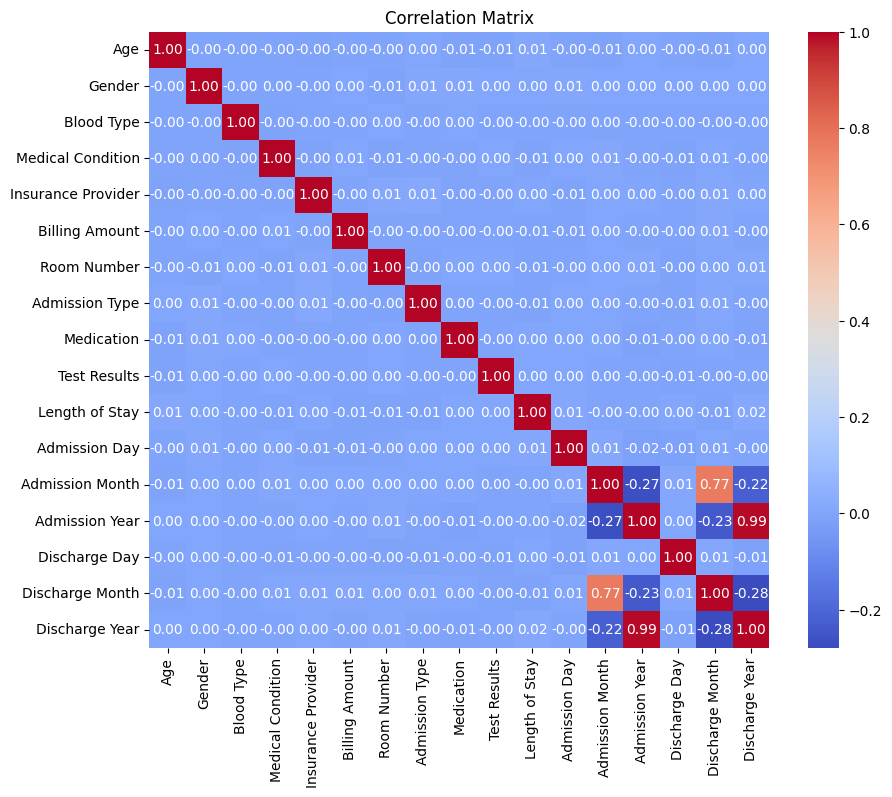

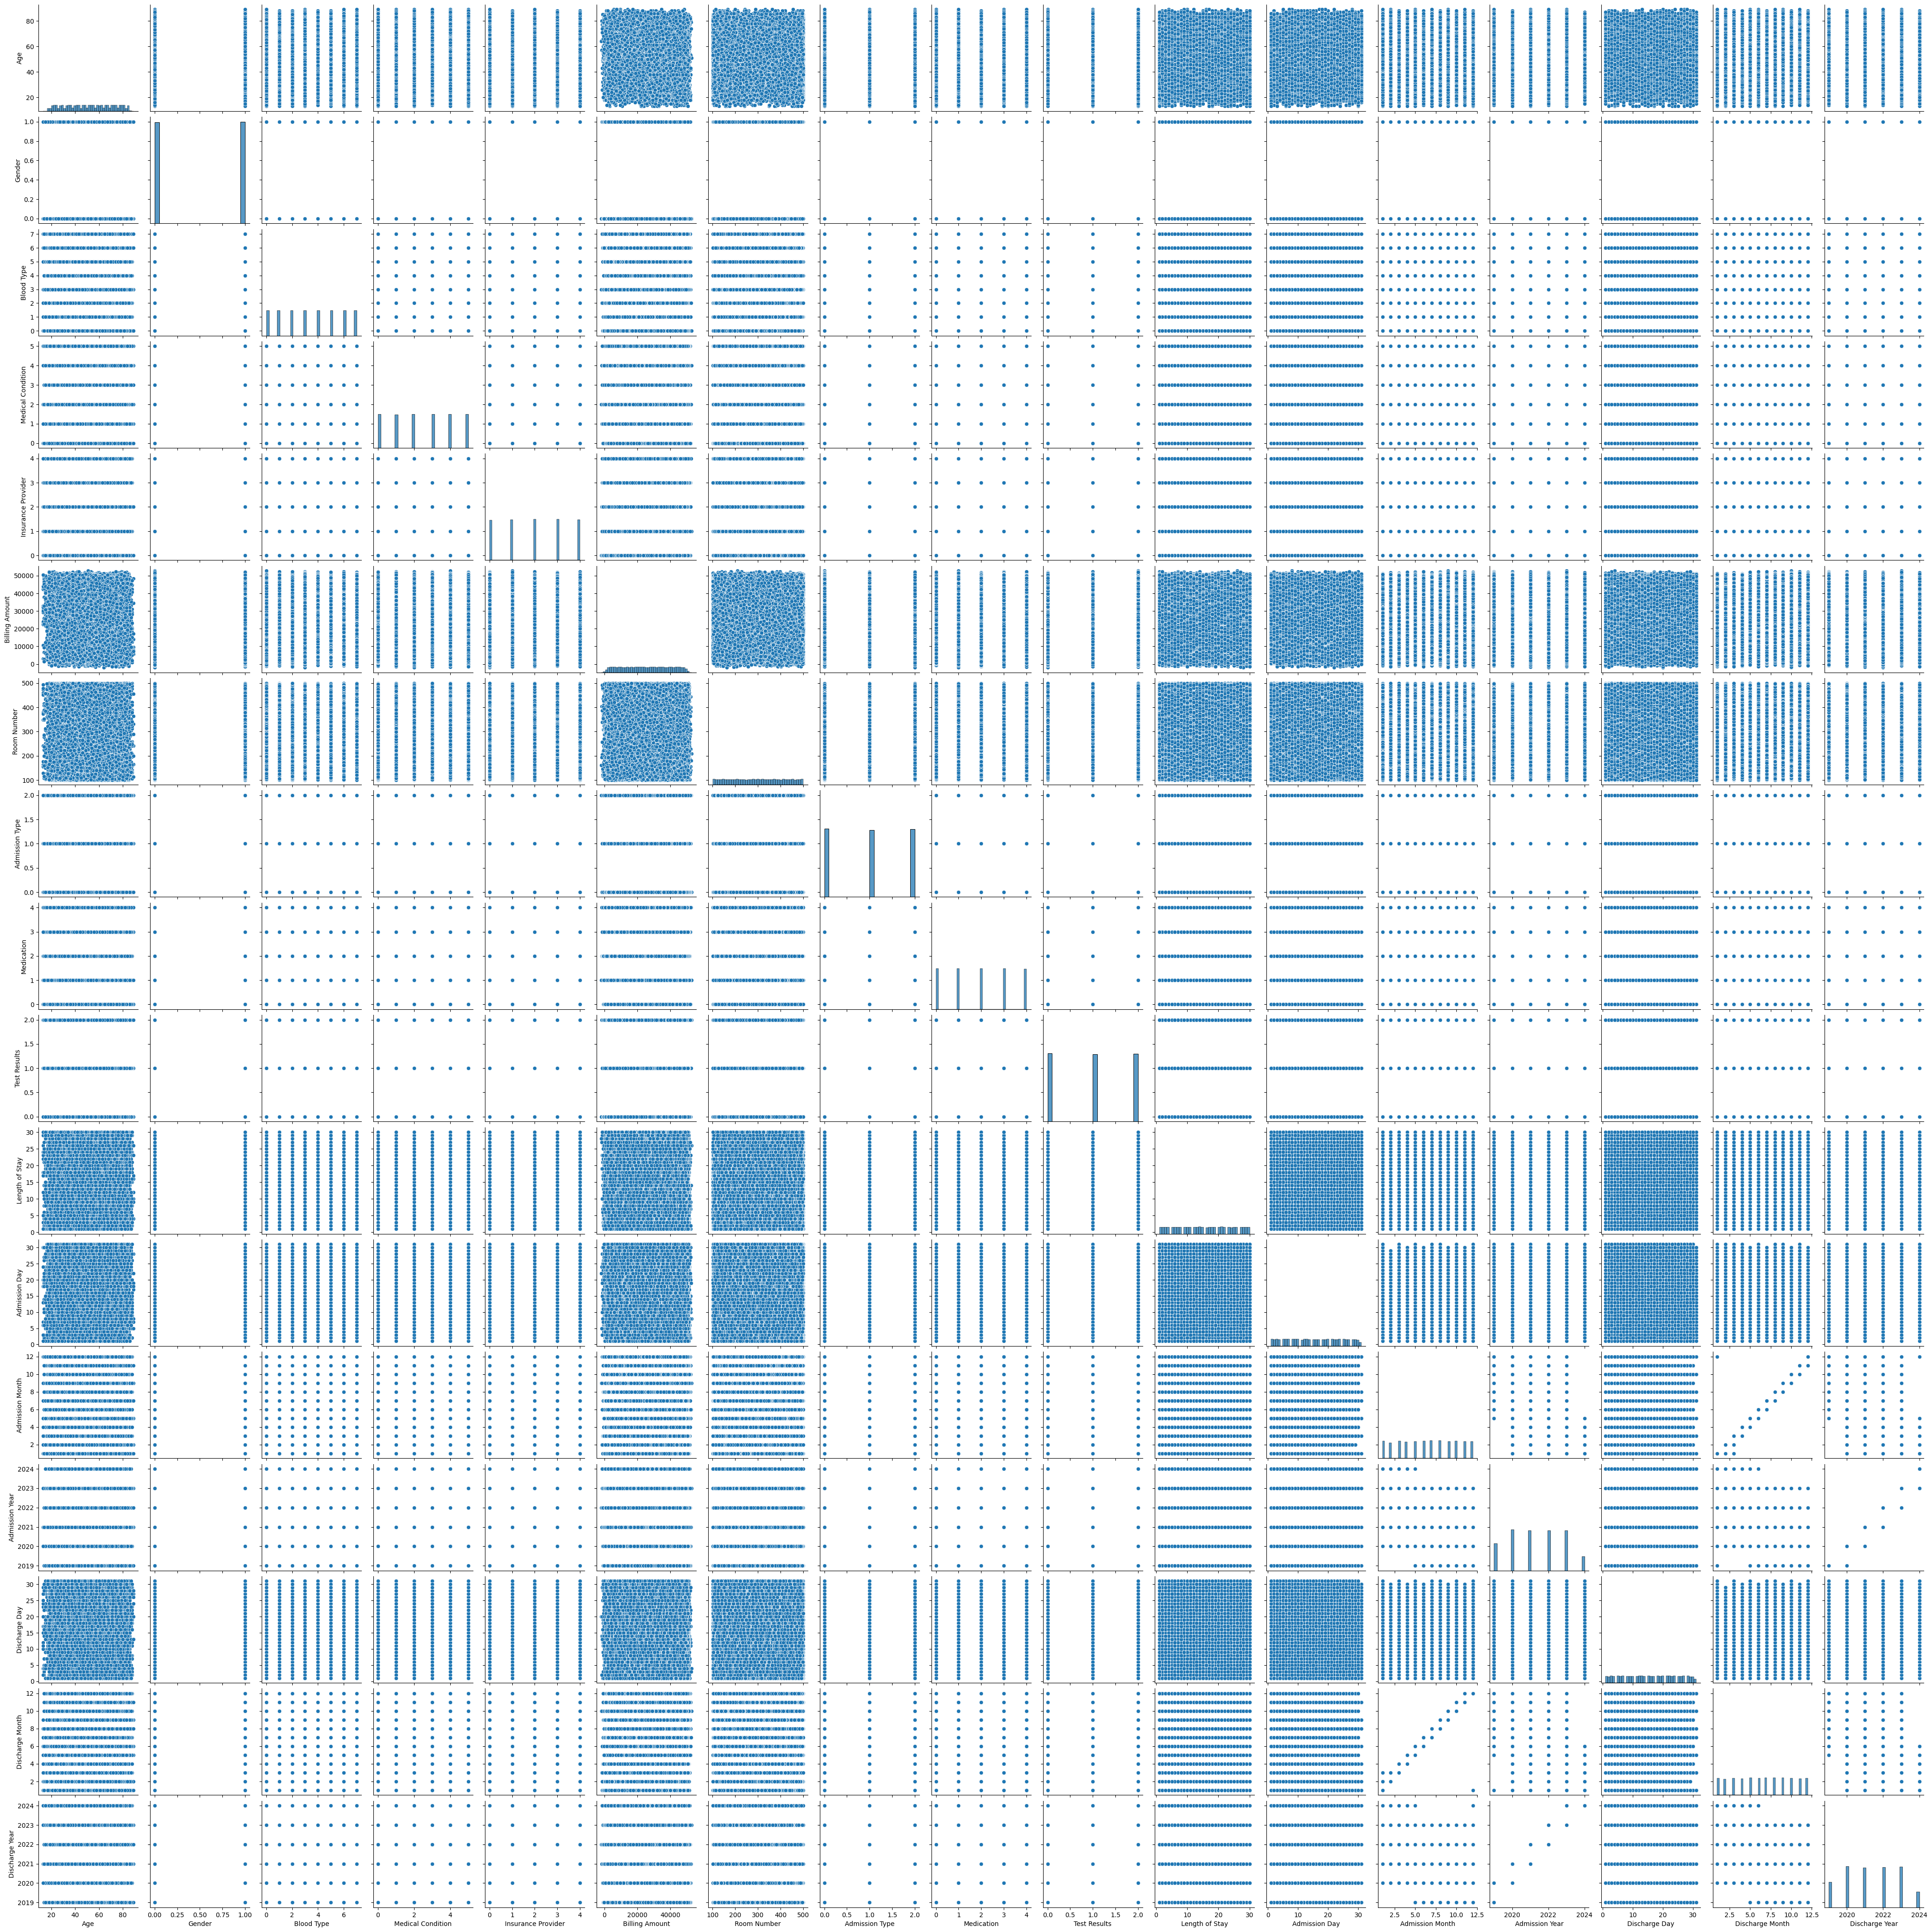

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(numeric_df)
plt.show()

In [30]:
plt.scatter(data=cdf, x='Medication', y='Test Results',  color='blue')
plt.xlabel("Admission Type")
plt.ylabel("Test Resuts")
plt.show()


NameError: name 'cdf' is not defined

# وريني اللوجيستيك ده بيقول اي 

we cant use liner regression becase  need clasification 


In [ ]:
cdf = df [['Age','Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Billing Amount','Length of Stay']]
cdf.head()


train test split

In [ ]:
X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition','Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication',  'Length of Stay', 'Admission Month']]
y =df[['Test Results',]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Define the solvers
solvers = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

results = {}

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for solver in solvers:
    LR_model = LogisticRegression(solver=solver, class_weight='balanced', max_iter=1000, C=1.0)
    LR_model.fit(X_train_scaled, y_train)
    predictions = LR_model.predict(X_test_scaled)
    predictions_probability = LR_model.predict_proba(X_test_scaled)
    cf_matrix = confusion_matrix(y_test, predictions)

    results[solver] = {
        "classification_report": classification_report(y_test, predictions),
        "confusion_matrix": cf_matrix
    }

    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    plt.title(f"Confusion Matrix - Solver: {solver}")
    plt.show()

# Print classification reports for each solver
for solver, result in results.items():
    print(f"Solver: {solver}")
    print(result["classification_report"])


# القيم بتاعت الوجيستيك مش حلوه 


# احنا نجرب الشجر و اللي منه 

In [ ]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition', 'Admission Type', 'Medication','Length of Stay']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',max_depth=5).fit(X_train,y_train) 
tree_model

In [ ]:
predictions = tree_model.predict(X_test)
print(predictions[1:10])
print(y_test[1:10])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

solver_list = ['gini', 'entropy'] 

for solver in solver_list:
    tree_model = DecisionTreeClassifier(criterion=solver, max_depth=7)
    tree_model.fit(X_train, y_train)
    predictions = tree_model.predict(X_test)
    predictions_probabilty = tree_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f')
    plt.show()  # Show the heatmap
    
    csr = classification_report(y_test, predictions)
    print(f"{solver}:")
    print(csr)


# مش شغال يا مولانا 

# وريني الغابه دي بتقول اي 

In [ ]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year','Discharge Day','Discharge Month','Discharge Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree_model = RandomForestClassifier(criterion='gini',n_estimators=43,max_depth=None).fit(X_train,y_train) 
tree_model

In [ ]:
predictions = tree_model.predict(X_test)
print(predictions[1:10])
print(y_test[1:10])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
criterion = 'gini'
tree_model = RandomForestClassifier(criterion=criterion,n_estimators=43,max_depth=None)
tree_model.fit(X_train,y_train)
predictions = tree_model.predict(X_test)
predictions_probabilty = tree_model.predict_proba(X_test)

cf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix,annot=True,fmt='.0f')
plt.show()

csr = classification_report(y_test,predictions)
print (csr)


# لحد دلوقتي الغابه عامله شغل 

# نخش علي  الديب

In [ ]:
df.columns

In [ ]:
from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Admission Type','Age', 'Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [ ]:
ncols = X_train.shape[1]
ncols

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(666,input_shape=(ncols,),activation="relu"))
model.add(Dense(128,activation="relu"))
# Add an output layer with one neuron and no activation specified for regression
model.add(Dense(1))

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam() #learning Rate = 0.01
model.compile(loss='mean_squared_error',optimizer=optimizer , metrics = ['mae'])

In [ ]:
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose =True )
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [ ]:
ncols = X_train.shape[1]
ncols

In [ ]:
hist.head()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns
import numpy as np

# Assuming the model outputs logits and needs softmax
y_pred_prob = model.predict(X_test)
y_pred_prob = np.exp(y_pred_prob) / np.sum(np.exp(y_pred_prob), axis=1, keepdims=True)

# Ensure y_pred_prob sums to 1 across classes for each sample
assert np.allclose(np.sum(y_pred_prob, axis=1), 1), "The predicted probabilities do not sum to 1."

# Get the predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Assuming y_test contains class labels like [0, 1, 2] for a multi-class problem
num_classes = y_pred_prob.shape[1]

# Binarize y_test for multi-class ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Calculate AUC using 'ovr' for multi-class classification
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f'AUC: {auc:.2f}')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])

plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# هات يبني ال SVM

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split


X = df[['Medical Condition','Length of Stay','Admission Type','Age','Admission Day','Admission Month','Admission Year']].to_numpy()
y = df["Test Results"].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)



# Train an SVM model
model = SVC(probability=True, kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.2f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()